# 散射截面 (Cross Section) 与 Rutherford 散射仿真

庞龙刚@华中师范大学

In [1]:
# 注意使用 matplotlib notebook 这条 magic 命令后，画图要点 “关闭”按钮
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from tqdm import tqdm

plt.style.use(["science", "notebook", "no-latex"])

## 无轨迹如何探测力场

根据行星的轨迹可以推算引力的形式、根据电子的轨迹可以推算库仑力的形式，但这种根据轨迹来研究力场的方法不能推广到短程强相互作用，因为相互作用范围太小（fm 量级 ~ $10^{-15} m$），无法追踪入射粒子在靶粒子附近的轨迹。量子力学本身也不承认轨迹的概念。

这种情况下，基于统计的散射截面 (cross section) 就成为研究粒子间相互作用的少有的途径。

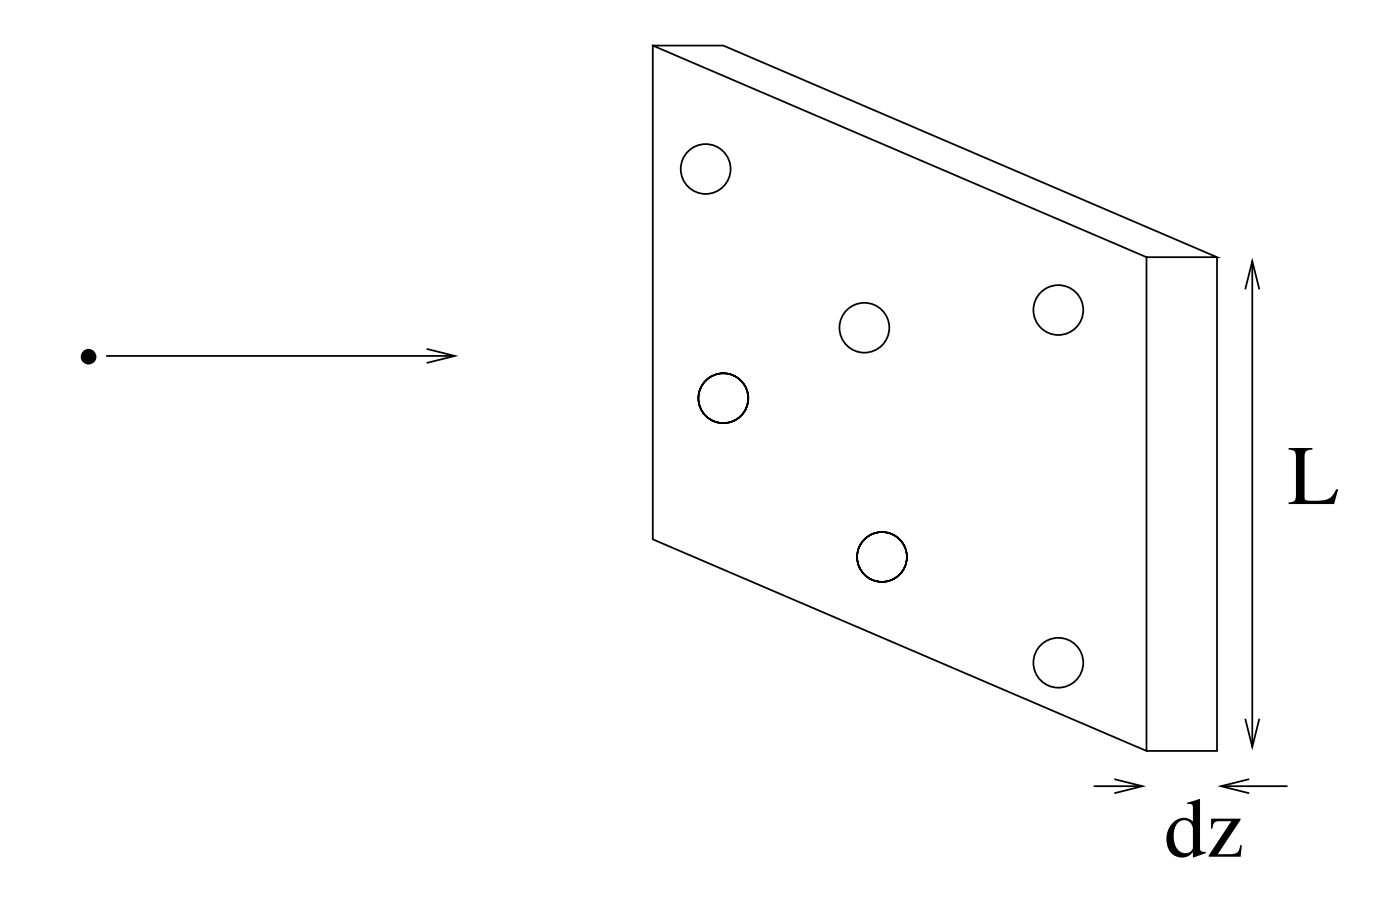

In [2]:
Image("images/cross_section.png", height=400)

## 散射截面的一般定义
一个很小的粒子入射在一块边长为 L, 厚度为 $dz$ 的正方形板材上。设板材中分布着 N=6 个靶粒子，半径都为 R。
则入射粒子击中靶粒子的概率等于所有靶粒子的面积之和除以板材的面积，

\begin{align}
dP = {N \pi R^2 \over L^2}
\end{align}

分子分母同乘以 $dz$ 得到第二个定义 $n\sigma dz$。

\begin{align}
dP = {N \color{red}{\pi R^2} \over L^2 dz} dz = n \sigma dz
\end{align}
1. $n = N / (L^2 dz)$ 表示靶粒子的密度
2. $\color{red}{\sigma = \pi R^2}$ 为单个靶粒子的散射截面(cross section)，量纲为 [面积/靶粒子]。

原子核直径 $\sim 10 {\rm fm}$, 因此定义了一个 cross section 常用的单位，

\begin{align}
{\rm 1\ bar = 100\ fm^2 = 10^{-28} m^2}
\end{align}

形象记忆：一个边长为 10 fm 的方形原子核，散射截面为 1 bar！

## 微分散射截面 （differential cross section)

问题：如果入射粒子被靶粒子散射，在远处观察，它的角分布是什么？

答案是需要定义微分散射截面 ${d \sigma \over d \Omega}$，其中，$d\Omega = 2\pi d\cos\theta \sim 2\pi \sin\theta d\theta$。

总的弹性散射截面等于微分散射截面对极角($\theta$) 和 方位角 $\phi$ 的积分，

\begin{align}
\sigma_{el} = \int d\Omega {d \sigma \over d\Omega} = \int_0^{2\pi} d\phi \int_0^{\pi} \sin\theta d\theta {d \sigma \over d\Omega}(\theta, \phi)
\end{align}
一般 ${d \sigma \over d\Omega}(\theta, \phi)$ 不依赖于 $\phi$, 可以对 $\phi$ 直接积分。

微分散射截面包含了更加丰富的信息，可以帮助限定粒子之间相互作用势能的形式。

<img src="images/differential_cross_section.png" height="80%"></img>

## 经典散射 classical cross section

经典的散射截面使用力场中粒子的轨迹来推导，

<img src="images/classical_cross_section.png"></img>

1. 碰撞参数 (impact parameter) b 大，则散射角 $\theta(b)$ 小，碰撞参数 $b$ 小，则散射角大。
2. 最终的散射角分布不仅依赖于 $b$, 还依赖于粒子之间的相互作用势能。
2. 半径 $b$ 到 $b+db$ 的圆环中的粒子， cross section 为 $ d\sigma = 2\pi b db$， 最终会散射到 $d\Omega = 2\pi \sin\theta d\theta$ 立体角

因此可得经典散射的微分散射截面为，

\begin{align}
{d\sigma \over d\Omega} = { 2\pi b(\theta) db \over 2 \pi \sin\theta d\theta } = { |b(\theta)\ db |\over |\sin\theta d\theta| }
\end{align}

最终只要知道 $b$ 与无穷远处探测到的粒子散射角度 $\theta$ 之间的关系，就能计算出经典微分散射截面。

对于半径为 R 的硬球势，$b$ 与 $\theta$ 之间的关系为，
\begin{align}
b = R \cos\theta / 2
\end{align}

其微分散射截面 (differential cross section) 如下，
\begin{align}
{d\sigma \over d\Omega} = { |b(\theta)|\over |\sin\theta| }\left|{db \over d\theta}\right| = {R^2 \over 4}
\end{align}

即总的散射截面 (total cross section) , $\sigma = \pi R^2$.

带电粒子产生的库伦势为，

\begin{align}
V(r) = {Z_1 Z_2 e^2 \over 4 \pi \epsilon_0 r} = {Z_1 Z_2 \alpha \over r}
\end{align}

一个带电粒子在库伦势中的轨迹为双曲线 (hyperbolas)，

\begin{align}
b = {Z_1 Z_2 \alpha \over 2 E_k} \cot{\theta \over 2}
\end{align}

代入上面公式得到，
\begin{align}
{d\sigma \over d\Omega} = { |b(\theta)|\over |\sin\theta| }\left|{db \over d\theta}\right| = \left({Z_1 Z_2 \alpha \over 4 E_k}\right)^2 {1 \over \sin^4\theta / 2}
\end{align}

各向同性散射(又称 S 波散射）的微分截面等于总截面除以 $4\pi$ 立体角，

\begin{align}
{d \sigma \over d \Omega} = {\sigma \over 4 \pi}
\end{align}

但粒子物理中大部分散射都不是各向同性散射，比如使用 $\alpha$ 粒子打金箔的卢瑟福(Rutherford) 散射（对应前一页库伦势），

\begin{align}
{d \sigma \over d \Omega} = \left({ Z_1 Z_2 e^2 \over 16 \pi \epsilon_0 E_k }\right)^2 {1 \over \sin^4 {\theta\over 2}} = \left({ \alpha Z_1 Z_2 \over 4 E_k }\right)^2 {1 \over \sin^4 {\theta\over 2}} 
\end{align}

使用精细结构常数 ${e^2 \over 4 \pi \epsilon_0} = \alpha = {1 \over 137}$ 可以简化计算。

$Z_1, Z_2$ 分别是入射核与靶核的质子数。

其中 $E_k$ 是入射 $\alpha$ 的能量，当时 Rutherford 使用了 ${\rm E_k = 6 MeV}$。

此处做个量纲分析，公式左边微分散射截面量纲为 $fm^2$, 公式的右端只有 $1/E_k^2$ 有量纲，为 $ {\rm MeV^{-2}}$, 两者如何转化？

研究粒子物理与核物理，大家一般使用自然单位制，定义 $c = \hbar = 1$, 根据

\begin{align}
\hbar c = 197 \ {\rm MeV \cdot fm} = 1
\end{align}

可以得到 $ 1 {\rm MeV^{-1}} = 197 fm$, 即 $1 \ {\rm MeV^{-2} = 197^2 \ fm^2}$。

In [3]:
def rutherford_differential_cross_section(Ek=6, Z1=2, Z2=79):
    '''plot the differential cross section for rutherford scattering
    :Ek: [MeV] the energy of the incident alpha particle, default = 6 MeV by Rutherford
    :Z1: the charge of the projectile, default = 2 for alpha 
    :Z2: the charge of the target, default = 79 for Au
    
    :return: theta, dsigma/dOmega(theta)
             where theta is the polar angle along the beam direction
             dsigma/dOmega(theta) is the differential cross section in [fm]'''
    theta_min = 0.1
    # 卢瑟福散射公式在 theta=0 处发射，使用 theta_min 截断
    theta = np.linspace(theta_min, np.pi, 100)
    alpha = 1 / 137
    hbarc = 197.32 
    area = hbarc**2 / Ek**2
    coef = (alpha * Z1 * Z2 / 4)**2
    return theta, coef * area / np.sin(0.5 * theta)**4 

Text(0.5, 1.0, 'Rutherford Scattering')

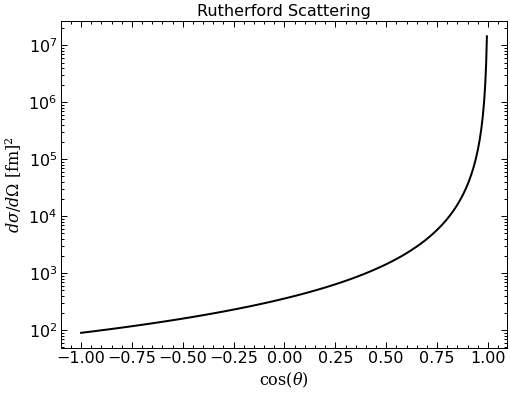

In [4]:
theta, dsigma_dOmega = rutherford_differential_cross_section()

plt.semilogy(np.cos(theta), dsigma_dOmega, "k")
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel(r"$d \sigma / d\Omega\ {\rm [fm]^2}$")
plt.title("Rutherford Scattering")

In [5]:
from scipy.integrate import simps

dsigma_dtheta = dsigma_dOmega * 2 * np.pi * np.sin(theta)

total_cross_section = simps(dsigma_dtheta, theta)

print("total cross section per Au nucleus = %s fm^2"%total_cross_section)

total cross section per Au nucleus = 459098.6969048037 fm^2


In [6]:
# 假设金箔厚度为 dz = 0.1 mm = 1.0E-4 m = 1.0E11 fm
def density(L = 3.0E5):
    '''
    :L: [fm] the size of the Au atom along each direction, 3 A
    return the density of Au atoms
    in units [fm]^{-3}'''
    return 1 / L**3

dz = 1.0E11
dP = total_cross_section * density() * dz
print("(LxL=3A * 3A, dz=0.1 mm, num of scatters = %s"%dP)


(LxL=3A * 3A, dz=0.1 mm, num of scatters = 1.7003655440918657


<img src="images/neutron_elastic_differential_cross_sections.png" height="80%"></img>

在 URQMDL 或 SMASH 类相对论分子动力学模型中，强子与强子之间的碰撞判据为，

**如果两个强子之间的横向距离（又称碰撞参数 impact parameter）小于由 cross section 定义的硬球半径，则判定发生一次碰撞**。

\begin{align}
b < \sqrt{\sigma \over \pi}
\end{align}

使用散射截面判据替代轨迹追踪可以降低计算量。

## Rutherford 经典散射仿真

接下来做个 Rutherford 散射仿真实验（注意：此处不需要知道散射微分截面）。

1. 原子直径约 3 $\mathring{A}$ （$=3\times 10^{5}$ fm）
2. 原子核直径约为 10 fm，与原子直径相比可忽略不计
3. 考虑 2 维简单情形，有 N = 6 个 Au 原子
3. $\alpha$ 粒子受到所有 6 个 Au 原子核的库伦相互作用

In [7]:
from matplotlib.patches import Circle

class Material:
    def __init__(self,  Z=79, atoms_per_layer=3, layers=2):
        self.proton_per_atom = Z
        self.atoms_per_layer = atoms_per_layer
        self.num_atoms = atoms_per_layer * layers
        self.atom_size = 3           # in unit A, where 1A = 10^{-10} m
        # layers of atoms and thickness of material
        self.layers = layers
        self.thickness = self.atom_size * layers
        self.xpos, self.ypos = self.atom_positions()
        
    def atom_positions(self):
        d = self.atom_size
        x = np.arange(0, self.atoms_per_layer) * d
        y = np.arange(0, self.layers) * d
        xpos, ypos = np.meshgrid(x, y, indexing='ij')  
        return xpos.flatten(), ypos.flatten()
    
    def plot(self):
        for x, y in zip(self.xpos, self.ypos):
            self.plot_atom(x, y)
    
    def plot_atom(self, x, y, radius=1.5):
        circ = Circle((x, y), radius=radius,
                      facecolor='white',
                      edgecolor='black',
                      alpha=0.1)
        plt.gca().add_patch(circ)
        plt.plot(x, y, 'ro')
        plt.gca().set_aspect('equal')

Text(3, 0.5, '${\\rm 3 \\mathring{A}}$')

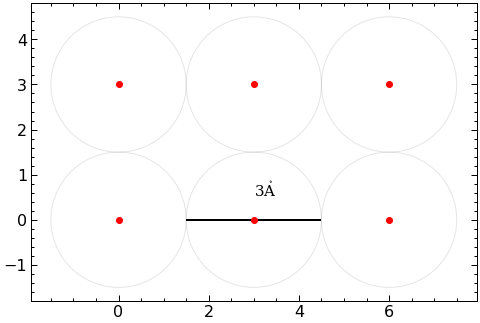

In [8]:
# 将 金箔材料 可视化
gold_paper = Material()
gold_paper.plot()

plt.hlines(0, 1.5, 4.5)
plt.text(3, 0.5, r"${\rm 3 \mathring{A}}$", size=15)

知道了金 （Au）原子核的分布，可以计算叠加的库伦势能在整个空间的分布，库仑力是势能的负梯度。

\begin{align}
V(x, y) &= \sum_{i=0}^{N=6} V(x_i, y_i) = \sum_{i=0}^{N=6} {\alpha Z_1 \over \sqrt{(x - x_i)^2 + (y-y_i)^2}} \\
F_x(x, y) &= - Z_2 {\partial V(x, y) \over \partial x} \\
F_y(x, y) &= - Z_2 {\partial V(x, y) \over \partial y} \\
\end{align}

力场（矢量场） 也可写为势能的负梯度， $ \vec{F} = - \nabla V$，使用 np.gradient 计算。

此处我们只计算一次力场，并保存为数据表，力场中 $\alpha$ 粒子的加速度每次从表中距离最近的点读取。
（注意：这样做可能导致最终的角分布不连续）

In [9]:
class ElectricField:
    def __init__(self, material, xarr, yarr):
        '''计算给定原子核（比如alpha粒子）在材料中受到的力场
        Z: num of protons of projectile 
        material: object of Material class
        xarr：one-dim np array to show the range of the field along x
        yarr：one-dim np array to show the range of the field along y
        '''
        self.matter = material
        self.xarr = xarr
        self.yarr = yarr
        self.xgrid, self.ygrid = np.meshgrid(xarr, yarr, indexing='ij')
        self.force_field = self.force(Z2=2)
        
    def potential(self):
        '''compute the potential field times e for force calculation
        :return: Z2 e^2 / (4 pi epsilon_0 r) = Z2 * alpha / r
                 units [A]^{-2}'''
        alpha = 1 / 137.0
        phi = np.zeros_like(self.xgrid)
        cutoff = 1.0E-6
        # add the contribution of all Au nucleus
        for x, y in zip(self.matter.xpos, self.matter.ypos):
            dx = self.xgrid - x
            dy = self.ygrid - y
            r = np.sqrt(dx*dx + dy*dy) + cutoff
            potential = self.matter.proton_per_atom * alpha / r
            phi += potential
            
        return phi
    
    def force(self, Z2=2):
        ''':return: force field on alpha in units [A]^{-2}'''
        phi = self.potential()
        gx, gy = np.gradient(phi, self.xarr, self.yarr)
        force_x = - Z2 * gx
        force_y = - Z2 * gy
        return force_x, force_y

Text(0.5, 1.0, 'Potential Field')

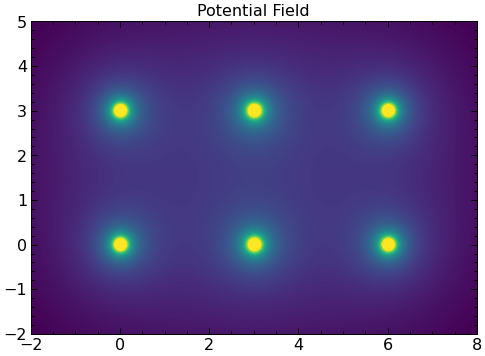

In [10]:
xarr = np.linspace(-2, 8, 1001)
yarr = np.linspace(-2, 5, 1001)

field = ElectricField(gold_paper, xarr, yarr)
phi = field.potential()

extent = [-2, 8, -2, 5]
plt.imshow(phi.T, extent=extent, origin='lower', vmax=5)
plt.gca().set_aspect('equal')
plt.title("Potential Field")
#plt.colorbar()

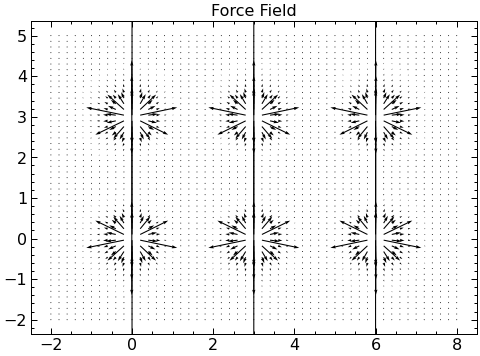

In [12]:
fx, fy = field.force()

with plt.style.context(["science", "notebook", "no-latex"]):
    extent = [-2, 8, -2, 5]
    plt.quiver(field.xgrid[::20, ::20], 
               field.ygrid[::20, ::20], 
               fx[::20, ::20], 
               fy[::20, ::20])
    
    plt.gca().set_aspect('equal')
    plt.title("Force Field")
    #plt.colorbar()

In [13]:
from numba import jit

@jit    # 计算 alpha 原子核在力场中 (x, y) 点的加速度
def acceleration(x, y, xarr, yarr, fx, fy, nucleons=4):
    ''' acceleration at a given point (x, y) in the force field fx and fy
    :x: float, x position of nucleus, in unit [A], 
    :y: float, y position of nucleus, in unit [A], 
    :xarr: the 1D x np array for force field
    :yarr: the 1D y np array for force field
    :fx: the x component of the force field
    :fy: the y component of the force field
    
    :return: (ax, ay) for projectile with A nucleons
          default nucleons=4 for alpha particle
          unit: A^{-1}'''
    mproton = 938                     # MeV
    mass = mproton * nucleons
    
    i = np.abs(x - xarr).argmin()
    j = np.abs(y - yarr).argmin()

    hbarc = 197                       # MeV * fm
    unit_toA = hbarc *  1.0E-5        # MeV^{-1} to unit A
    ax = fx[i, j] / mass * unit_toA
    ay = fy[i, j] / mass * unit_toA
    
    if x < xarr[0] or x > xarr[-1]: ax = 0
    if y < yarr[0] or y > yarr[-1]: ay = 0

    return ax, ay

In [14]:
@jit
def random_track(Ek=6, fake_accelerate=1, ymax=8):
    '''generate a random track
    直线轨迹的概率太高，使用 fake_accelerate 增大库伦加速'''
    x0 = np.random.rand() * 10 - 2
    y0 = -2 - 80* np.random.rand()
    vx = 0
    mproton = 938
    vy = np.sqrt(2*Ek/mproton)
    dt = 1
    
    track = []
    x, y = x0, y0
    track.append([x, y])
    
    while True and y < ymax:
        ax, ay = acceleration(x, y, xarr, yarr, fx, fy)
        vx += ax * dt * fake_accelerate
        vy += ay * dt * fake_accelerate
        x += vx * dt
        y += vy * dt
        track.append([x, y])   
        
    angle = np.arctan2(vx, vy)
    
    return np.array(track), angle

<IPython.core.display.Javascript object>


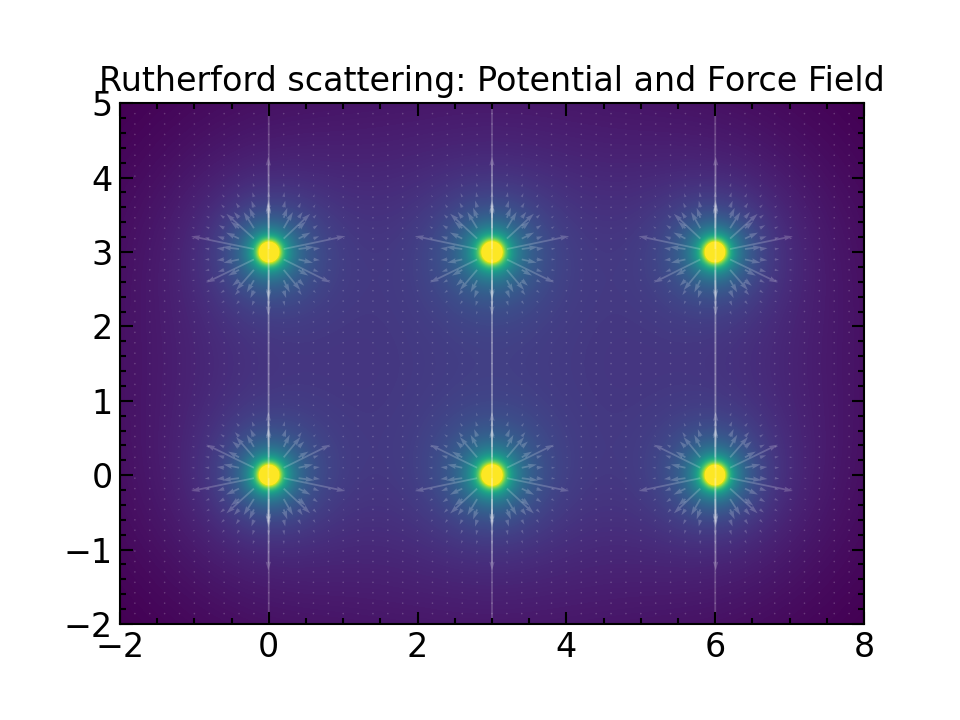

In [15]:
%matplotlib notebook

extent = [-2, 8, -2, 5]
fig1, ax1 = plt.subplots()

plt.imshow(phi.T, extent=extent, origin='lower', vmax=5)
plt.quiver(field.xgrid[::20, ::20], 
           field.ygrid[::20, ::20], 
           fx[::20, ::20], 
           fy[::20, ::20],
           color = 'white',
           alpha = 0.2)

plt.gca().set_aspect('equal')
plt.title("Rutherford scattering: Potential and Force Field")

ntracks = 10

tracks = [random_track(fake_accelerate=500)[0] for i in range(ntracks)]
lines = [plt.plot([], [], 'wo', ms=5)[0] for i in range(ntracks)]

def update(i):
    for n in range(ntracks):
        if len(tracks[n][:, 0]) > i:
            lines[n].set_data(tracks[n][i, 0],
                              tracks[n][i, 1])
    return lines

anim = FuncAnimation(fig1, update, frames=600, interval=10, blit=True)
#anim.save('images/rutherford_scattering.mp4')

<img src="images/rutherford_scattering_gif.gif"></img>

## 蒙特卡洛仿真

上面的仿真使用了哈密顿力学与运动方程，给定哈密顿量 $H = T + V$, 得到运动方程，

\begin{align}
{d \over dt} \begin{bmatrix} q \\ p \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \begin{bmatrix} \partial H / \partial q \\ \partial H / \partial p \end{bmatrix} 
\end{align}

然后使用运动方程，一步步更新粒子的坐标 $q$ 和 动量$p$。

如果使用蒙特卡洛仿真，则只需要计算出总散射截面 $\sigma$ 以及单个粒子穿过 $dz$ 长度时的平均碰撞次数 $\lambda = dP = n \sigma dz$，其中 $n$ 为靶粒子密度，然后根据泊松分布 $p(\lambda)$ 抽样碰撞次数 k，再对 k 次散射使用微分散射截面 $d\sigma / d\Omega$ 抽样散射角 $\theta$。

**作业：**

之前计算过，如果是 0.1 mm 厚的金箔，6 MeV 电子伏特的 $\alpha$ 粒子穿过时平均散射次数为 1.7 次。
    
根据泊松分布 ${\rm poisson}(\lambda=1.7)$ 抽取散射次数，并对每次散射，使用微分散射截面中的角度依赖 $p(\theta) = {\sin\theta \over \sin^4 {\theta \over 2} }$ 抽样散射角 $\theta$, 最后统计 100 万个 $\alpha$ 粒子穿过此金箔后沿束流方向的动量分布。